<a href="https://colab.research.google.com/github/nnilayy/CAFA-5-Protein-Function-Prediction/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

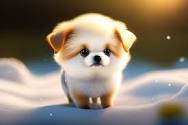

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
rgb_image=cv2.imread("/content/doggo.jpeg")
cv2_imshow(rgb_image)

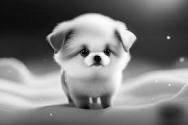

In [ ]:
yuv_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2YUV)
# y_component = yuv_image[:,:,0]
# cv2_imshow(y_component)

In [ ]:
import numpy as np
import cv2

# Prepare BGR input (OpenCV uses BGR color ordering and not RGB):
bgr = cv2.imread('/content/doggo.jpeg')
bgr = cv2.resize(bgr, (150, 100)) # Resize to even number of columns

# Split channles, and convert to float
b, g, r = cv2.split(bgr.astype(float))

rows, cols = r.shape

# Compute Y, U, V according to the formula described here:
# https://developer.apple.com/documentation/accelerate/conversion/understanding_ypcbcr_image_formats
# U applies Cb, and V applies Cr

# Use BT.709 standard "full range" conversion formula
y = 0.2126*r + 0.7152*g + 0.0722*b
u = 0.5389*(b-y) + 128
v = 0.6350*(r-y) + 128

# Downsample u horizontally
u = cv2.resize(u, (cols//2, rows), interpolation=cv2.INTER_LINEAR)

# Downsample v horizontally
v = cv2.resize(v, (cols//2, rows), interpolation=cv2.INTER_LINEAR)

# Convert y to uint8 with rounding:
y = np.round(y).astype(np.uint8)

# Convert u and v to uint8 with clipping and rounding:
u = np.round(np.clip(u, 0, 255)).astype(np.uint8)
v = np.round(np.clip(v, 0, 255)).astype(np.uint8)

# Interleave u and v:
uv = np.zeros_like(y)
uv[:, 0::2] = u
uv[:, 1::2] = v

# Merge y and uv channels
yuv422 = cv2.merge((y, uv))

In [ ]:
def yuv422_to_grayscale(yuv422_buffer):
    num_pixels = len(yuv422_buffer)
    grayscale_buffer = bytearray(num_pixels // 2)

    for i in range(0, num_pixels, 4):
        # Extract Y components from the pair of pixels
        y1 = yuv422_buffer[i]
        y2 = yuv422_buffer[i + 2]

        # Calculate grayscale values using the Y components
        grayscale1 = y1
        grayscale2 = y2

        # Store the grayscale values in the output buffer
        grayscale_buffer[i // 2] = grayscale1
        grayscale_buffer[(i // 2) + 1] = grayscale2

    return grayscale_buffer

# Example usage
yuv_image = bytearray(yuv422)
grayscale_buffer = yuv422_to_grayscale(yuv_image)
grayscale_array = np.frombuffer(grayscale_buffer, dtype=np.uint8)
grayscale_image = grayscale_array.reshape((100, 150))

In [ ]:
grayscale_image.shape

(100, 150)

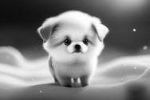

In [ ]:

# grayscale_array.shape
cv2_imshow(grayscale_image)
# print(grayscale_buffer)